In [1]:
# Installs
%pip install pandas
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib
%pip install q
%pip install joblib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import joblib

sns.set(style="whitegrid", context="notebook")

In [4]:
##  Predicting GCE A-Level Maths grade from prior attainment

# Load the Dataset
file_path = ("Data/synthetic_uk_attainment_10000_1.csv")
df = pd.read_csv(file_path) 
df.head()

,ref_id,SATS_score,GCSE_grade,GCE_AS_grade,GCE_A_grade,GCE_A_Maths_grade
0,1006542,109,5,C,A,C
1,1005075,104,6,A,A*,B
2,1000951,110,7,B,C,C
3,1000164,117,9,A,B,B
4,1002633,103,7,A,B,C


In [5]:
# ref_id               int
# SATS_score           int
# GCSE_grade           int (1–9)
# GCE_AS_grade         object (A, B, C, D, E, U)
# GCE_A_grade          object (A*, A, B, C, D, E, U)
# GCE_A_Maths_grade    object (A*, A, B, C, D, E, U)


In [6]:
#data exploration
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ref_id             10000 non-null  int64 
 1   SATS_score         10000 non-null  int64 
 2   GCSE_grade         10000 non-null  int64 
 3   GCE_AS_grade       10000 non-null  object
 4   GCE_A_grade        10000 non-null  object
 5   GCE_A_Maths_grade  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [7]:
# Basic statistics for numeric columns
df.describe(include="all")

,ref_id,SATS_score,GCSE_grade,GCE_AS_grade,GCE_A_grade,GCE_A_Maths_grade
count,1.000000e+04,10000.000000,10000.000000,10000,10000,10000
unique,NaN,NaN,NaN,6,7,6
top,NaN,NaN,NaN,B,B,C
freq,NaN,NaN,NaN,3701,3245,4406
mean,1.005000e+06,104.984700,5.691800,NaN,NaN,NaN
std,2.886896e+03,7.589639,1.679612,NaN,NaN,NaN
min,1.000000e+06,90.000000,1.000000,NaN,NaN,NaN
25%,1.002500e+06,100.000000,4.000000,NaN,NaN,NaN
50%,1.005000e+06,105.000000,6.000000,NaN,NaN,NaN
75%,1.007499e+06,110.000000,7.000000,NaN,NaN,NaN


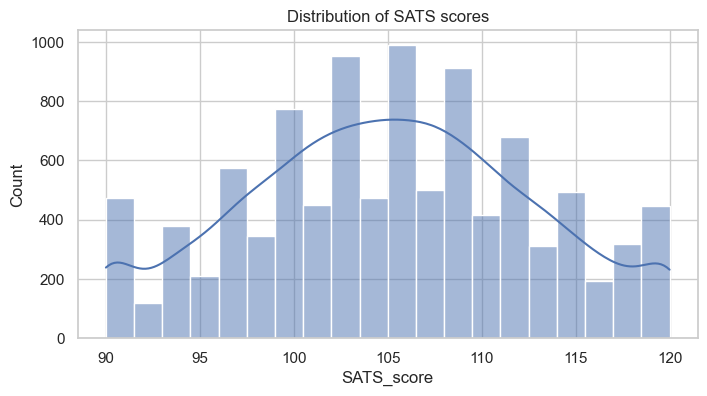

In [8]:
# Basic EDA: distributions and structure
# Distribution of SATS scores
plt.figure(figsize=(8, 4))
sns.histplot(df["SATS_score"], bins=20, kde=True)
plt.title("Distribution of SATS scores")
plt.xlabel("SATS_score")
plt.ylabel("Count")
plt.show()

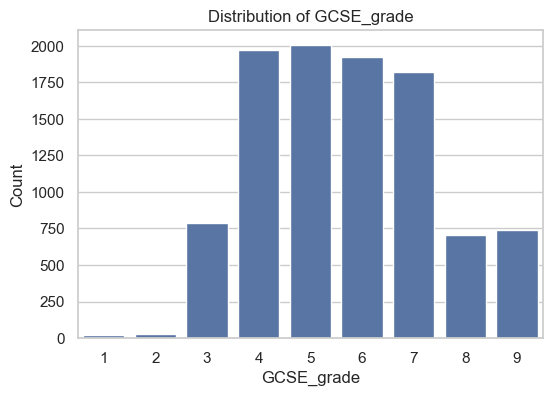

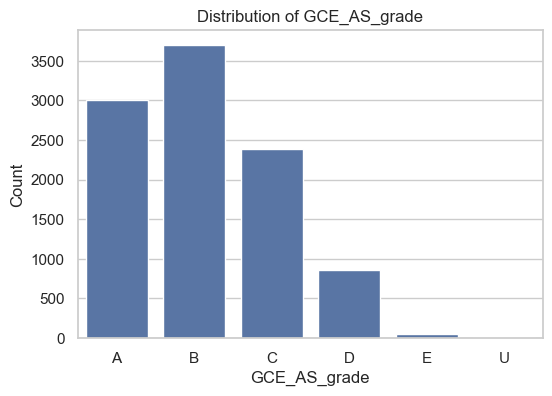

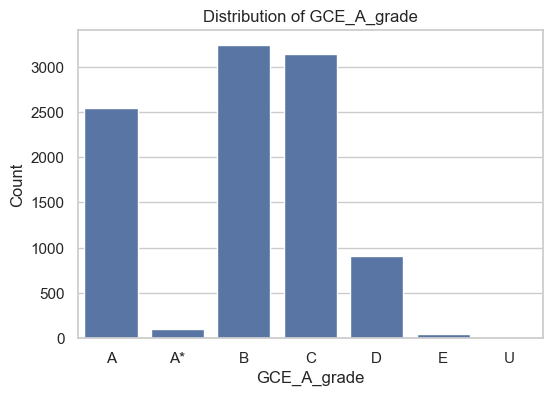

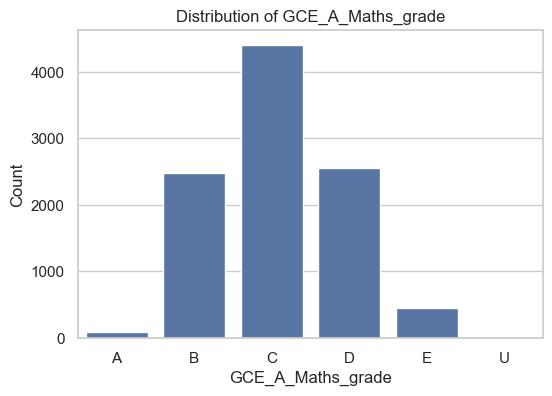

In [9]:
# Distribution of each grade column
grade_cols = ["GCSE_grade", "GCE_AS_grade", "GCE_A_grade", "GCE_A_Maths_grade"]

for col in grade_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], order=sorted(df[col].unique()))
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [10]:
# check for missing values
df.isna().sum()

ref_id               0
SATS_score           0
GCSE_grade           0
GCE_AS_grade         0
GCE_A_grade          0
GCE_A_Maths_grade    0
dtype: int64

In [11]:
#
grade_order = [["U", "E", "D", "C", "B", "A", "A*"]]

encoder = OrdinalEncoder(categories=grade_order)

# Columns that use letter grades
grade_cols = ["GCSE_grade", "GCE_AS_grade", "GCE_A_grade", "GCE_A_Maths_grade"]

# Fit and transform
df[grade_cols] = encoder.fit_transform(df[grade_cols])

df[grade_cols].head()

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).